# DataFrame creation in Python

## Loading data from a CSV file

Download Google Spreadsheet data as CSV.

In [1]:
import urllib

tb_deaths_url_csv = 'https://docs.google.com/spreadsheets/d/12uWVH_IlmzJX_75bJ3IH5E-Gqx6-zfbDKNvZqYjUuso/pub?gid=0&output=CSV'
tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
tb_new_url_csv = 'https://docs.google.com/spreadsheets/d/1Pl51PcEGlO9Hp4Uh0x2_QM0xVb53p2UDBMPwcnSjFTk/pub?gid=0&output=csv'

local_tb_deaths_file = 'tb_deaths_100.csv'
local_tb_existing_file = 'tb_existing_100.csv'
local_tb_new_file = 'tb_new_100.csv'

deaths_f = urllib.urlretrieve(tb_deaths_url_csv, local_tb_deaths_file)
existing_f = urllib.urlretrieve(tb_existing_url_csv, local_tb_existing_file)
new_f = urllib.urlretrieve(tb_new_url_csv, local_tb_new_file)

Read CSV into `DataFrame` by using `read_csv()`. 

In [2]:
import pandas as pd

deaths_df = pd.read_csv(local_tb_deaths_file, index_col = 0, thousands  = ',').T
existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands  = ',').T
new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands  = ',').T

We have specified `index_col` to be 0 since we want the country names to be the row labels. We also specified the `thousands` separator to be ',' so Pandas automatially parses cells as numbers. Then, we `traspose()` the table to make the time series for each country correspond to each column.

We will concentrate on the existing cases for a while. We can use `head()` to check the first few lines.  

In [3]:
existing_df.head()

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426


By using the attribute `columns` we can read and write column names.

In [4]:
existing_df.columns

Index([u'Afghanistan', u'Albania', u'Algeria', u'American Samoa', u'Andorra',
       u'Angola', u'Anguilla', u'Antigua and Barbuda', u'Argentina',
       u'Armenia', 
       ...
       u'Uruguay', u'Uzbekistan', u'Vanuatu', u'Venezuela', u'Viet Nam',
       u'Wallis et Futuna', u'West Bank and Gaza', u'Yemen', u'Zambia',
       u'Zimbabwe'],
      dtype='object', name=u'TB prevalence, all forms (per 100 000 population per year)', length=207)

Similarly, we can access row names by using `index`.

In [5]:
existing_df.index

Index([u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007'],
      dtype='object')

We will use them to assign proper names to our column and index names.

In [6]:
deaths_df.index.names = ['year']
deaths_df.columns.names = ['country']
existing_df.index.names = ['year']
existing_df.columns.names = ['country']
new_df.index.names = ['year']
new_df.columns.names = ['country']
existing_df

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426
1995,397,43,42,22,30,508,35,12,74,68,...,30,119,234,42,346,93,50,244,585,439
1996,397,42,43,0,28,512,35,12,71,74,...,28,111,226,41,312,123,49,233,602,453
1997,387,44,44,25,23,363,36,11,67,75,...,27,122,218,41,273,213,46,207,626,481
1998,374,43,45,12,24,414,36,11,63,74,...,28,129,211,40,261,107,44,194,634,392


## Data indexing

There is a [whole section](http://pandas.pydata.org/pandas-docs/stable/indexing.html) devoted to indexing and selecting data in `DataFrames` in the oficial documentation. Let's apply them to our Tuberculosis cases dataframe.

We can acces each data frame `Series` object by using its column name, as with a Python dictionary. In our case we can access each country series by its name.  

In [7]:
existing_df['United Kingdom']

year
1990     9
1991     9
1992    10
1993    10
1994     9
1995     9
1996     9
1997     9
1998     9
1999     9
2000     9
2001     9
2002     9
2003    10
2004    10
2005    11
2006    11
2007    12
Name: United Kingdom, dtype: int64

Or just using the key value as an attribute.  

In [8]:
existing_df.Spain

year
1990    44
1991    42
1992    40
1993    37
1994    35
1995    34
1996    33
1997    30
1998    30
1999    28
2000    27
2001    26
2002    26
2003    25
2004    24
2005    24
2006    24
2007    23
Name: Spain, dtype: int64

Or we can access multiple series passing their column names as a Python list.

In [9]:
existing_df[['Spain', 'United Kingdom']]

country,Spain,United Kingdom
year,,
1990,44,9
1991,42,9
1992,40,10
1993,37,10
1994,35,9
1995,34,9
1996,33,9
1997,30,9
1998,30,9


We can also access individual cells as follows.

In [10]:
existing_df.Spain['1990']

44

Or using any Python list indexing for slicing the series.

In [13]:
existing_df[['Spain', 'United Kingdom']][0:5]

country,Spain,United Kingdom
year,,
1990,44,9
1991,42,9
1992,40,10
1993,37,10
1994,35,9


With the whole DataFrame, slicing inside of [] slices the rows. This is provided largely as a convenience since it is such a common operation.

In [14]:
existing_df[0:5]

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426


### Indexing in production Python code

As stated in the official documentation, the Python and NumPy indexing operators [] and attribute operator . provide quick and easy access to pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there’s little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. For production code, it is recommended that you take advantage of the optimized pandas data access methods exposed in this section.

For example, the `.iloc` method can be used for **positional** index access.

In [15]:
existing_df.iloc[0:2]

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417


While `.loc` is used for **label** access.

In [16]:
existing_df.loc['1992':'2005']

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426
1995,397,43,42,22,30,508,35,12,74,68,...,30,119,234,42,346,93,50,244,585,439
1996,397,42,43,0,28,512,35,12,71,74,...,28,111,226,41,312,123,49,233,602,453
1997,387,44,44,25,23,363,36,11,67,75,...,27,122,218,41,273,213,46,207,626,481
1998,374,43,45,12,24,414,36,11,63,74,...,28,129,211,40,261,107,44,194,634,392
1999,373,42,46,8,22,384,36,9,58,86,...,28,134,159,39,253,105,42,175,657,430
2000,346,40,48,8,20,530,35,8,52,94,...,27,139,143,39,248,103,40,164,658,479


And we can combine that with series indexing by column.

In [20]:
existing_df.loc[['1992','1998','2005'],['Spain','United Kingdom']]

country,Spain,United Kingdom
year,,
1992,40,10
1998,30,9
2005,24,11


This last approach is the recommended when using Pandas data frames, specially when doing assignments (something we are not doing here). Otherwise, we might have assignment problems as described [here](http://pandas-docs.github.io/pandas-docs-travis/indexing.html#why-does-the-assignment-when-using-chained-indexing-fail).

## Data selection by value

We can also use logical expression to select just data that satisfy certain conditions. So first, let's see what happens when we use logical operators with data frames or series objects.  

In [16]:
existing_df>10

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1991,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1992,True,True,True,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1993,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1994,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1996,True,True,True,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


And if applied to individual series.

In [17]:
existing_df['United Kingdom'] > 10

year
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005     True
2006     True
2007     True
Name: United Kingdom, dtype: bool

The result of these expressions can be used as a indexing vector (with `[]` or `.iloc') as follows.

In [18]:
existing_df.Spain[existing_df['United Kingdom'] > 10]

year
2005    24
2006    24
2007    23
Name: Spain, dtype: int64

An interesting case happens when indexing several series and some of them happen to have `False` as index and other `True` at the same position. For example:

In [19]:
existing_df[ existing_df > 10 ]

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,NaN,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426
1995,397,43,42,22,30,508,35,12,74,68,...,30,119,234,42,346,93,50,244,585,439
1996,397,42,43,NaN,28,512,35,12,71,74,...,28,111,226,41,312,123,49,233,602,453
1997,387,44,44,25,23,363,36,11,67,75,...,27,122,218,41,273,213,46,207,626,481
1998,374,43,45,12,24,414,36,11,63,74,...,28,129,211,40,261,107,44,194,634,392


Those cells where `existing_df` doesn't happen to have more than 10 cases per 100K give `False` for indexing. The resulting data frame have a `NaN` value for those cells. A way of solving that (if we need to) is by using the `where()` method that, apart from providing a more expressive way of reading data selection, acceps a second argument that we can use to impute the `NaN` values. For example, if we want to have 0 as a value.

In [20]:
existing_df.where(existing_df > 10, 0)

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,0,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426
1995,397,43,42,22,30,508,35,12,74,68,...,30,119,234,42,346,93,50,244,585,439
1996,397,42,43,0,28,512,35,12,71,74,...,28,111,226,41,312,123,49,233,602,453
1997,387,44,44,25,23,363,36,11,67,75,...,27,122,218,41,273,213,46,207,626,481
1998,374,43,45,12,24,414,36,11,63,74,...,28,129,211,40,261,107,44,194,634,392


## Descriptive statistics

MORE: http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

The basic data descriptive statistics method for a `pandas.DataFrame` is `describe()`. It is the equivalent to R `data.frame` function `summary()`.  

In [21]:
df_summary = existing_df.describe()
df_summary

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,353.333333,36.944444,47.388889,12.277778,25.277778,413.444444,35.611111,10.833333,61.222222,74.944444,...,28.055556,128.888889,186.000000,40.888889,282.666667,126.222222,43.388889,194.333333,535.277778,512.833333
std,64.708396,6.915220,4.487091,9.886447,7.274497,97.751318,1.243283,2.812786,20.232634,16.129885,...,3.717561,15.911109,62.027508,2.422660,57.322616,86.784083,8.332353,52.158131,91.975576,113.411925
min,238.000000,22.000000,42.000000,0.000000,17.000000,281.000000,34.000000,7.000000,35.000000,49.000000,...,23.000000,102.000000,102.000000,38.000000,220.000000,13.000000,31.000000,130.000000,387.000000,392.000000
25%,305.000000,32.000000,44.000000,6.000000,19.250000,321.250000,35.000000,9.000000,41.250000,62.000000,...,25.000000,116.500000,128.750000,39.000000,234.250000,63.250000,36.250000,146.750000,459.000000,420.750000
50%,373.500000,40.500000,45.500000,9.000000,22.500000,399.000000,35.000000,10.000000,60.500000,77.000000,...,27.500000,131.500000,185.000000,41.000000,257.000000,106.000000,43.000000,184.500000,521.500000,466.000000
75%,404.500000,42.000000,50.750000,16.250000,31.500000,512.000000,36.000000,12.750000,77.000000,85.750000,...,30.750000,143.000000,240.000000,42.000000,349.000000,165.750000,51.500000,248.500000,620.000000,616.750000
max,436.000000,44.000000,56.000000,42.000000,39.000000,530.000000,38.000000,16.000000,96.000000,99.000000,...,35.000000,152.000000,278.000000,46.000000,365.000000,352.000000,55.000000,265.000000,680.000000,714.000000


There is a lot of information there. We can access individual summaries as follows.

In [22]:
df_summary[['Spain','United Kingdom']]

country,Spain,United Kingdom
count,18.000000,18.000000
mean,30.666667,9.611111
std,6.677442,0.916444
min,23.000000,9.000000
25%,25.250000,9.000000
50%,29.000000,9.000000
75%,34.750000,10.000000
max,44.000000,12.000000


There is a plethora of descriptive statistics methods in Pandas (check the [documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)). Some of them are already included in our summary object, but there are many more. In following tutorials we will make good use of them in order to better understand our data.  

For example, we can obtain the percentage change over the years for the number of tuberculosis cases in Spain.

In [23]:
tb_pct_change_spain = existing_df.Spain.pct_change()
tb_pct_change_spain

year
1990         NaN
1991   -0.045455
1992   -0.047619
1993   -0.075000
1994   -0.054054
1995   -0.028571
1996   -0.029412
1997   -0.090909
1998    0.000000
1999   -0.066667
2000   -0.035714
2001   -0.037037
2002    0.000000
2003   -0.038462
2004   -0.040000
2005    0.000000
2006    0.000000
2007   -0.041667
Name: Spain, dtype: float64

And from there get the maximum value.

In [24]:
tb_pct_change_spain.max()

0.0

And do the same for the United Kingdom.

In [25]:
existing_df['United Kingdom'].pct_change().max()

0.11111111111111116

If we want to know the index value (year) we use `argmax` (callex `idmax` in later versions of Pandas) as follows.

In [26]:
existing_df['Spain'].pct_change().argmax()

'1998'

In [27]:
existing_df['United Kingdom'].pct_change().argmax()

'1992'

That is, 1998 and 1992 were the worst years in Spain and the UK respectibely regarding the increase of infectious TB cases.

### Plotting

Pandas DataFrames implement up to three plotting methods out of the box (check the [documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#id11)). The first one is a basic line plot for each of the series we include in the indexing. The first line might be needed when plotting while using IPython notebook.    

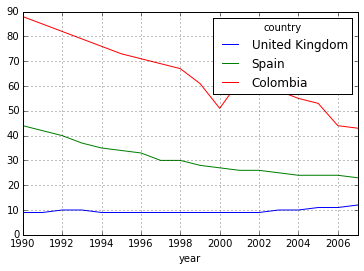

In [28]:
%matplotlib inline

existing_df[['United Kingdom', 'Spain', 'Colombia']].plot()

Or we can use boxplots to obtain a summarised view of a given series as follows.

/home/cluster/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2380: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x7f11b71af6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11b7127dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f11b713c110>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f11b7131a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f11b71270d0>,
  <matplotlib.lines.Line2D at 0x7f11b70dffd0>]}

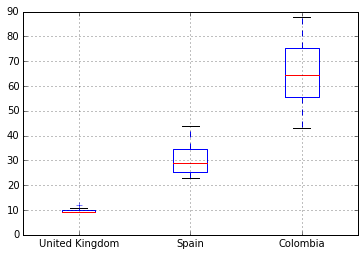

In [29]:
existing_df[['United Kingdom', 'Spain', 'Colombia']].boxplot()

There is also a histogram() method, but we can't use it with this type of data right now. 

### Function application and grouping

The `pandas.DataFrame` class defines several [ways of applying functions](http://pandas.pydata.org/pandas-docs/stable/api.html#id5) both, index-wise and element-wise. Some of them are already predefined, and are part of the descriptive statistics methods we have talked about.

In [30]:
existing_df.sum()

country
Afghanistan            6360
Albania                 665
Algeria                 853
American Samoa          221
Andorra                 455
Angola                 7442
Anguilla                641
Antigua and Barbuda     195
Argentina              1102
Armenia                1349
Australia               116
Austria                 228
Azerbaijan             1541
Bahamas                 920
Bahrain                1375
...
United Arab Emirates         577
United Kingdom               173
Tanzania                    5713
Virgin Islands (U.S.)        367
United States of America      88
Uruguay                      505
Uzbekistan                  2320
Vanuatu                     3348
Venezuela                    736
Viet Nam                    5088
Wallis et Futuna            2272
West Bank and Gaza           781
Yemen                       3498
Zambia                      9635
Zimbabwe                    9231
Length: 207, dtype: int64

We have just calculated the total number of TB cases from 1990 to 2007 for each country. We can do the same by year if we pass `axis=1` to use `columns` instead of `index` as axis.  

In [31]:
existing_df.sum(axis=1)

year
1990    40772
1991    40669
1992    39912
1993    39573
1994    39066
1995    38904
1996    37032
1997    37462
1998    36871
1999    37358
2000    36747
2001    36804
2002    37160
2003    36516
2004    36002
2005    35435
2006    34987
2007    34622
dtype: int64

It looks like there is a descent in the existing number of TB cases per 100K accross the world. Let's plot it.

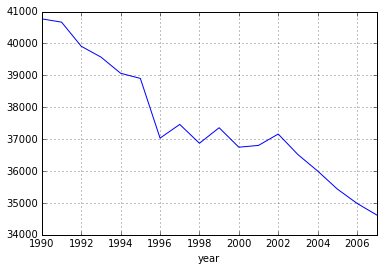

In [32]:
existing_df.sum(axis=1).plot()

However, what if we plot individual countries?

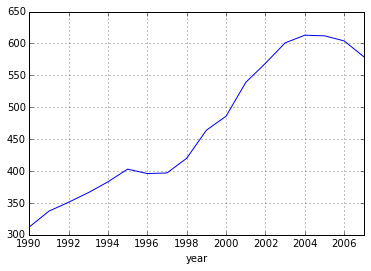

In [33]:
existing_df.Ethiopia.plot()

Saddly, some countries doesn't happen to improve at the same rate. There is a lot exploratory analysis we can do here, but we will answer our questions a bit later.  

Pandas also provides methods to apply other functions to data frames. They are three: `apply`, `applymap`, and `groupby`.  

#### apply and applymap

By using [`apply()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply) we can apply a function along an input axis of a `DataFrame`. Objects passed to the functions we apply are `Series` objects having as index either the DataFrame’s **index** (axis=0) or the **columns** (axis=1). Return type depends on whether passed function aggregates, or the reduce argument if the DataFrame is empty. For example, if we want to obtain the number of existing cases per million (instead of 100K) we can use the following.    

In [34]:
from __future__ import division # we need this to have float division without using a cast
existing_df.apply(lambda x: x/10)

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,43.6,4.2,4.5,4.2,3.9,51.4,3.8,1.6,9.6,5.2,...,3.5,11.4,27.8,4.6,36.5,12.6,5.5,26.5,43.6,40.9
1991,42.9,4.0,4.4,1.4,3.7,51.4,3.8,1.5,9.1,4.9,...,3.4,10.5,26.8,4.5,36.1,35.2,5.4,26.1,45.6,41.7
1992,42.2,4.1,4.4,0.4,3.5,51.3,3.7,1.5,8.6,5.1,...,3.3,10.2,25.9,4.4,35.8,6.4,5.4,26.3,49.4,41.5
1993,41.5,4.2,4.3,1.8,3.3,51.2,3.7,1.4,8.2,5.5,...,3.2,11.8,25.0,4.3,35.4,17.4,5.2,25.3,52.6,41.9
1994,40.7,4.2,4.3,1.7,3.2,51.0,3.6,1.3,7.8,6.0,...,3.1,11.6,24.2,4.2,35.0,17.2,5.2,25.0,55.6,42.6
1995,39.7,4.3,4.2,2.2,3.0,50.8,3.5,1.2,7.4,6.8,...,3.0,11.9,23.4,4.2,34.6,9.3,5.0,24.4,58.5,43.9
1996,39.7,4.2,4.3,0.0,2.8,51.2,3.5,1.2,7.1,7.4,...,2.8,11.1,22.6,4.1,31.2,12.3,4.9,23.3,60.2,45.3
1997,38.7,4.4,4.4,2.5,2.3,36.3,3.6,1.1,6.7,7.5,...,2.7,12.2,21.8,4.1,27.3,21.3,4.6,20.7,62.6,48.1
1998,37.4,4.3,4.5,1.2,2.4,41.4,3.6,1.1,6.3,7.4,...,2.8,12.9,21.1,4.0,26.1,10.7,4.4,19.4,63.4,39.2


We have seen how `apply` works element-wise. If the function we pass is applicable to single elements (e.g. division) pandas will broadcast that to every single element and we will get again a Series with the function applied to each element and hence, a data frame as a result in our case. However, the function intended to be used for element-wise maps is `applymap`.

#### groupby

Grouping is a powerful an important data frame operation in Exploratory Data Analysis. In Pandas we can do this easily. For example, imagine we want the mean number of existing cases per year in two different periods, before and after the year 2000. We can do the following.

In [35]:
mean_cases_by_period = existing_df.groupby(lambda x: int(x)>1999).mean()
mean_cases_by_period.index = ['1990-1999', '2000-2007']
mean_cases_by_period

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990-1999,403.700,42.1,43.90,16.200,30.3,474.40,36.400,12.800,76.6,64.400,...,30.600,117.00,234.500,42.300,323.300,152.900,49.800,234.500,557.200,428.10
2000-2007,290.375,30.5,51.75,7.375,19.0,337.25,34.625,8.375,42.0,88.125,...,24.875,143.75,125.375,39.125,231.875,92.875,35.375,144.125,507.875,618.75


The `groupby` method accepts different types of grouping, including a mapping function as we passed, a dictionary, a Series, or a tuple / list of column names. The mapping function for example will be called on each element of the object `.index` (the year string in our case) to determine the groups. If a `dict` or `Series` is passed, the `Series` or `dict` values are used to determine the groups (e.g. we can pass a column that contains categorical values). 

We can index the resulting data frame as usual.

In [36]:
mean_cases_by_period[['United Kingdom', 'Spain', 'Colombia']]

country,United Kingdom,Spain,Colombia
1990-1999,9.200,35.300,75.10
2000-2007,10.125,24.875,53.25


### Time series specific operations

Each column in a `pandas.DataFrame` is a `pandas.Series` as mentioned, and this is a central concept in Pandas. When our data frame index is a date, we can make the conversion and have access to some specific operations.  

There are many useful time series specific methods, but most of them work with finer grained dates (i.e. up to days), and we have years. However, this is how we should convert a date to the right format using Pandas.

In [37]:
existing_tdf = existing_df.copy()
existing_tdf.index = pd.to_datetime(existing_tdf.index)
existing_tdf.head()

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990-01-01,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991-01-01,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992-01-01,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993-01-01,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994-01-01,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426


You can find more about time series operations in the [Pandas oficial documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#id10).

## Answering our questions

Let's use now what we have learnt to answer each of the questions we made in the introductory section.  

### Countries with highest TB prevalence and incidence

**Question**: We want to know, per year, what country has the highest number of existing and new TB cases.

If we want just the top ones we can make use of `apply` and `argmax`. Remember that, be default, `apply` works wit columns (the countries in our case), and we want to apply it to each year. Therefore we need to traspose the data frame before using it, or we can pass the argument `axis=1`.

In [43]:
existing_df.apply(pd.Series.argmax, axis=1)

year
1990            Djibouti
1991            Djibouti
1992            Djibouti
1993            Djibouti
1994            Djibouti
1995            Djibouti
1996            Kiribati
1997            Kiribati
1998            Cambodia
1999    Korea, Dem. Rep.
2000            Djibouti
2001           Swaziland
2002            Djibouti
2003            Djibouti
2004            Djibouti
2005            Djibouti
2006            Djibouti
2007            Djibouti
dtype: object

But this is too simplistic. Instead, we want to get those countries that are in the fourth quartile. But first we need to find out the world general tendency.

### World trends in TB cases

In order to explore the world general tendency, we need to sum up every countrie's values for the three datasets,p er year.

In [44]:
deaths_total_per_year_df = deaths_df.sum(axis=1)
existing_total_per_year_df = existing_df.sum(axis=1)
new_total_per_year_df = new_df.sum(axis=1)

Now we will create a new `DataFrame` with each sum in a series that we will plot using the data frame `plot()` method.

In [45]:
world_trends_df = pd.DataFrame({'Total deaths per 100K' : deaths_total_per_year_df, 
                       'Total existing cases per 100K' : existing_total_per_year_df, 
                       'Total new cases per 100K' : new_total_per_year_df}, 
                       index=deaths_total_per_year_df.index)

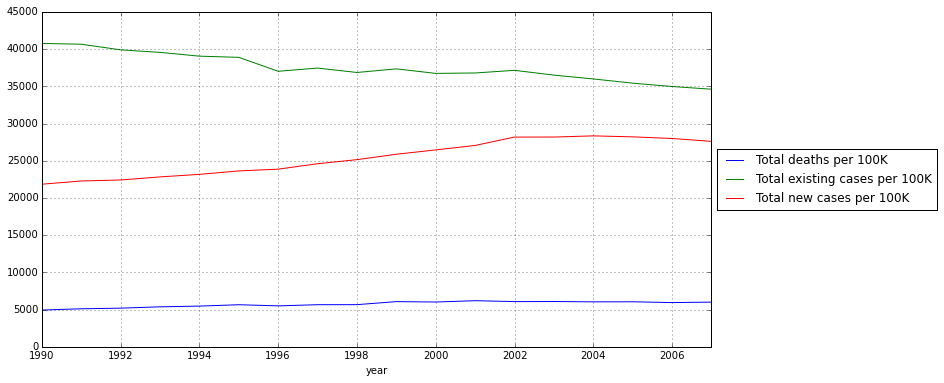

In [46]:
world_trends_df.plot(figsize=(12,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

It seems that the general tendency is for a decrease in the total number of **existing cases** per 100K. However the number of **new cases** has been increasing, although it seems reverting from 2005. So how is possible that the total number of existing cases is decreasing if the total number of new cases has been growing? One of the reasons could be the observed increae in the number of **deaths** per 100K, but the main reason we have to consider is that people recovers form tuberculosis thanks to treatment. The sum of the recovery rate plus the death rate is greater than the new cases rate. In any case, it seems that there are more new cases, but also that we cure them better. We need to improve prevention and epidemics control.      

### Countries out of tendency

So the previous was the general tendency of the world as a whole. So what countries are out of that tendency (for bad)? In order to find this out, first we need to know the distribution of countries in an average year.

In [47]:
deaths_by_country_mean = deaths_df.mean()
deaths_by_country_mean_summary = deaths_by_country_mean.describe()
existing_by_country_mean = existing_df.mean()
existing_by_country_mean_summary = existing_by_country_mean.describe()
new_by_country_mean = new_df.mean()
new_by_country_mean_summary = new_by_country_mean.describe()

We can plot these distributions to have an idea of how the countries are distributed in an average year.

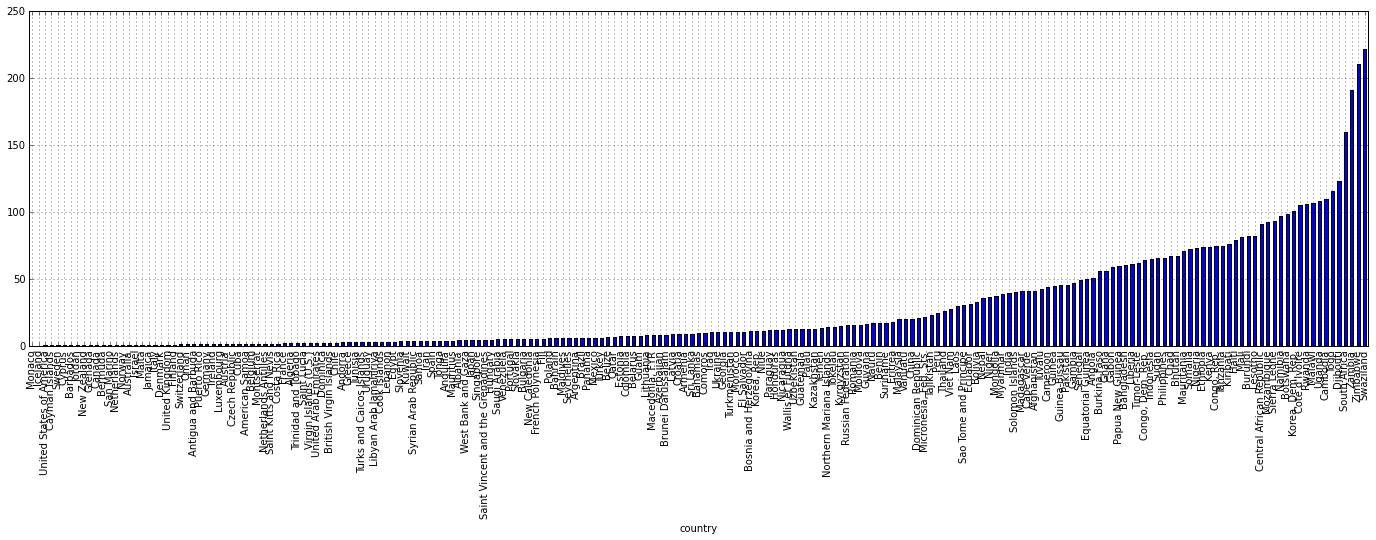

In [48]:
deaths_by_country_mean.order().plot(kind='bar', figsize=(24,6))

We want those countries beyond 1.5 times the inter quartile range (50%). We have thes evalues in:  

In [49]:
deaths_outlier = deaths_by_country_mean_summary['50%']*1.5
existing_outlier = existing_by_country_mean_summary['50%']*1.5
new_outlier = new_by_country_mean_summary['50%']*1.5

Now we can use these values to get those countries that, accross the period 1990-2007 has been beyond those levels.

In [50]:
# Now compare with the outlier threshold
outlier_countries_by_deaths_index = deaths_by_country_mean > deaths_outlier
outlier_countries_by_existing_index = existing_by_country_mean > existing_outlier
outlier_countries_by_new_index = new_by_country_mean > new_outlier

What proportion of countries do we have out of trend? For deaths:

In [56]:
num_countries = len(deaths_df.T)
sum(outlier_countries_by_deaths_index)/num_countries

0.39613526570048307

For existing cases:

In [57]:
sum(outlier_countries_by_existing_index)/num_countries

0.39613526570048307

For new cases:

In [64]:
sum(outlier_countries_by_new_index)/num_countries

0.38647342995169082

Now we can use these indices to filter our original dataframes.

In [65]:
outlier_deaths_df = deaths_df.T[ outlier_countries_by_deaths_index ].T
outlier_existing_df = existing_df.T[ outlier_countries_by_existing_index ].T
outlier_new_df = new_df.T[ outlier_countries_by_new_index ].T

This is serious stuff. We have more than one third of the world being outliers on the distribution of existings cases, new cases, and deaths by infectious tuberculosis. But what if we consider an outlier to be 5 times the IQR? Let's repeat the previous process.

In [66]:
deaths_super_outlier = deaths_by_country_mean_summary['50%']*5
existing_super_outlier = existing_by_country_mean_summary['50%']*5
new_super_outlier = new_by_country_mean_summary['50%']*5

super_outlier_countries_by_deaths_index = deaths_by_country_mean > deaths_super_outlier
super_outlier_countries_by_existing_index = existing_by_country_mean > existing_super_outlier
super_outlier_countries_by_new_index = new_by_country_mean > new_super_outlier

What proportion do we have now?

In [67]:
sum(super_outlier_countries_by_deaths_index)/num_countries

0.21739130434782608

Let's get the data frames.

In [68]:
super_outlier_deaths_df = deaths_df.T[ super_outlier_countries_by_deaths_index ].T
super_outlier_existing_df = existing_df.T[ super_outlier_countries_by_existing_index ].T
super_outlier_new_df = new_df.T[ super_outlier_countries_by_new_index ].T

Let's concentrate on epidemics control and have a look at the new cases data frame.

In [69]:
super_outlier_new_df

country,Bhutan,Botswana,Cambodia,"Congo, Rep.",Cote d'Ivoire,"Korea, Dem. Rep.",Djibouti,Kiribati,Lesotho,Malawi,...,Philippines,Rwanda,Sierra Leone,South Africa,Swaziland,Timor-Leste,Togo,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1990,540,307,585,169,177,344,582,513,184,258,...,393,167,207,301,267,322,308,163,297,329
1991,516,341,579,188,196,344,594,503,201,286,...,386,185,220,301,266,322,314,250,349,364
1992,492,364,574,200,209,344,606,493,218,314,...,380,197,233,302,260,322,320,272,411,389
1993,470,390,568,215,224,344,618,483,244,343,...,373,212,248,305,267,322,326,296,460,417
1994,449,415,563,229,239,344,630,474,280,373,...,366,225,263,309,293,322,333,306,501,444
1995,428,444,557,245,255,344,642,464,323,390,...,360,241,279,317,337,322,339,319,536,474
1996,409,468,552,258,269,344,655,455,362,389,...,353,254,297,332,398,322,346,314,554,501
1997,391,503,546,277,289,344,668,446,409,401,...,347,273,315,360,474,322,353,320,576,538
1998,373,542,541,299,312,344,681,437,461,412,...,341,294,334,406,558,322,360,326,583,580


Let's make some plots to get a better imppression.

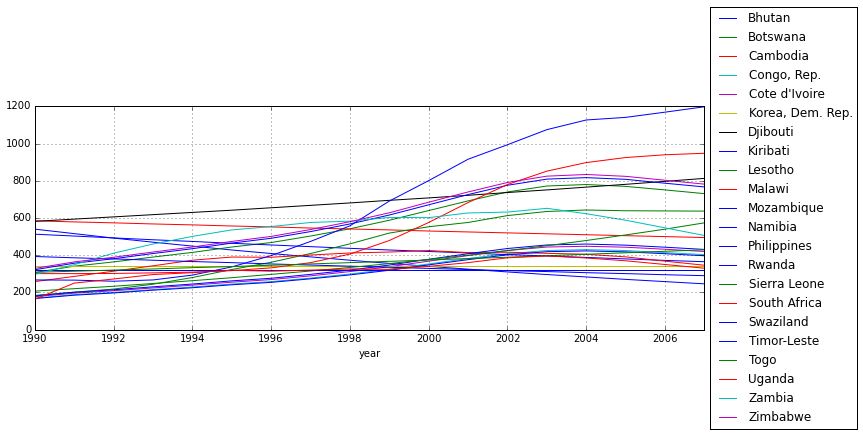

In [70]:
super_outlier_new_df.plot(figsize=(12,4)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

We have 22 countries where the number of new cases on an average year is greater than 5 times the median value of the distribution. Let's create a country that represents on average these 22.

In [71]:
average_super_outlier_country = super_outlier_new_df.mean(axis=1)
average_super_outlier_country

year
1990    314.363636
1991    330.136364
1992    340.681818
1993    352.909091
1994    365.363636
1995    379.227273
1996    390.863636
1997    408.000000
1998    427.000000
1999    451.409091
2000    476.545455
2001    502.409091
2002    525.727273
2003    543.318182
2004    548.909091
2005    546.409091
2006    540.863636
2007    535.181818
dtype: float64

Now let's create a country that represents the rest of the world.

In [72]:
avearge_better_world_country = new_df.T[ - super_outlier_countries_by_new_index ].T.mean(axis=1)
avearge_better_world_country

year
1990    80.751351
1991    81.216216
1992    80.681081
1993    81.470270
1994    81.832432
1995    82.681081
1996    82.589189
1997    84.497297
1998    85.189189
1999    86.232432
2000    86.378378
2001    86.551351
2002    89.848649
2003    87.778378
2004    87.978378
2005    87.086022
2006    86.559140
2007    85.605405
dtype: float64

Now let's plot this country with the average world country.

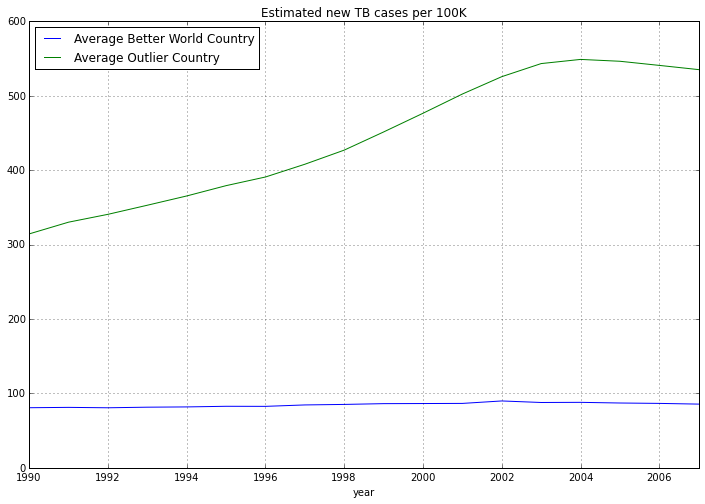

In [73]:
two_world_df = pd.DataFrame({ 'Average Better World Country': avearge_better_world_country,
                              'Average Outlier Country' : average_super_outlier_country},
                            index = new_df.index)
two_world_df.plot(title="Estimated new TB cases per 100K",figsize=(12,8))

The increase in new cases tendency is really stronger in the average super outlier country, so stronget that is difficult to percieve that same tendency in the *better world* country. The 90's decade brought a terrible increse in the number of TB cases in those countries. But let's have a look at the exact numbers.

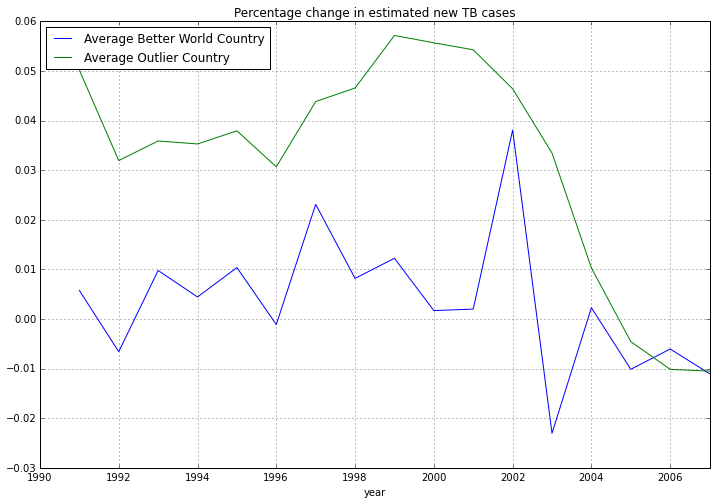

In [74]:
two_world_df.pct_change().plot(title="Percentage change in estimated new TB cases", figsize=(12,8))

The deceleration and reversion of that tendency seem to happen at the same time in both average countries, something around 2002? We will try to find out in the next section.

### Googling about events and dates in Tuberculosis

Well, actually we just went straight to [Wikipedia's entry about the disease](https://en.wikipedia.org/wiki/Tuberculosis#Epidemiology). In the epidemics sections we found the following: 

- The total number of tuberculosis cases has been decreasing since 2005, while **new cases** have decreased since 2002.  
 - This is confirmed by our previous analysis.    

- China has achieved particularly dramatic progress, with about an 80% reduction in its TB mortality rate between 1990 and 2010. Let's check it:  



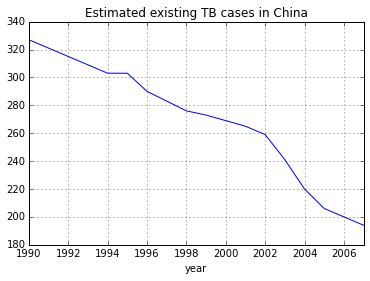

In [75]:
existing_df.China.plot(title="Estimated existing TB cases in China")

- In 2007, the country with the highest estimated incidence rate of TB was Swaziland, with 1,200 cases per 100,000 people.  

In [77]:
new_df.apply(pd.Series.argmax, axis=1)['2007']

'Swaziland'

There are many more findings Wikipedia that we can confirm with these or other datasets from Gapmind world. For example, TB and HIV are frequently associated, together with poverty levels. It would be interesting to joind datasets and explore tendencies in each of them. We challenge the reader to give them a try and share with us their findings. 

### Other web pages to explore

http://www.gatesfoundation.org/What-We-Do/Global-Health/Tuberculosis
http://www.gatesfoundation.org/Media-Center/Press-Releases/2007/09/New-Grants-to-Fight-Tuberculosis-Epidemic
